# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

Two hundred and forty eight tumor containing mice were treated with either one of nine different drugs or a placebo and observed for up to forty five days.  Observations were made every five days which included:  mouse id, timepoint, tumor volume in mm3, number of metastatic sites, sex, age, and weight.  For the analysis, two databases were merged and duplicate information was removed.  
Over the 45 days, the average tumor volume for the Placebo mice was 54 mm3.  The tumor volumes for seven of the nine drug regimens were within one standard deviation of the Placebo mice mean value.  Only the drugs (Capomulin and Ramicane) had average tumor volumes that were outside one standard deviation of the Placebo.  The average tumor volumes for Capomulin and Ramicane were smaller (approximately 40.5 mm3), which placed them close to the two standard deviation threshold from the Placebo mean.  Additionally, the bar plot for the number of timepoints recorded per drug regimen has the greatest number of timepoints for Capomulin and Ramicane.  This implies a greater level of survival for the mice in the Capomulin and Ramicane drug regimens.
Approximately equal distribution of sexes of the mice in the study is shown via a pie plot.  However, this analysis is for all 10 cohorts of mice.  In order to show that the sex of the mouse is unrelated to outcome, we need further analysis of the sex of mice in each drug regimen studied.
Instead of looking at the tumor volume over the course of the 45 day study, a table was generated with the final tumor volume for each mouse.  Analysis then focused on the four drugs of: Capomulin, Ramicane, Infubinol, and Ceftamin.  Interquartile range (IQR) analysis was carried out to characterize the spread of the final tumor volume as well as to identify any outliers in the data.  The spread of tumor volumes was smaller for both Capomulin and Ramicane compared to Ceftamin and Infubinol.  Additionally, one outlier was identified in the Infubinol data set.  The final tumor volumes for Capomulin and Ramicane were approximately 38 mm3 compared to approximately 60 mm3 for Ceftamin and Infubinol.  In other words, the tumors in the Capomulin and Ramicane treated mice were approximately 60% of the volume of the tumors in the Ceftamin and Infubinol treated mice.  It would be helpful to have included the data on the Placebo mice for comparison as well.
The rest of this initial analysis focused on Capomulin treated mice.  A line plot for Capomulin treated mouse ‘x401’ shows the decrease in tumor volume over the course of the 45 day study.  This would benefit from the inclusion of the tumor volumes for a placebo treated mouse as well.  For the Capomulin treated mice, we generated a scatter plot of the average tumor volume over the 45 day study vs the average weight of the mouse and performed linear regression.  The scatter plot shows the overall trend that larger mice had in general larger tumor volumes.  This statement is supported by a correlation value of 0.84.  This indicates that statements about tumor volume must also take into account the weight of the mouse being studied if one is solely talking about changes in size instead of percentage change in size of tumors.  Additionally, weight distributions across drug regimens need to be accounted for when talking about absolute values of tumor volumes instead of percent changes in tumor volume for a given mouse.  
In summary, 248 tumor containing mice were divided into cohorts for one of 10 treatments.  The mice treated with Capomulin or Ramicane showed the most reduction in tumor volume, approximately two standard deviation smaller than the mean value for the placebo group.  The tumor volumes of the other drug treatments were all within one standard deviation of the mean of the placebo group.  This reduction in tumor volumes for Capomulin and Ramicane was also apparent when looking at the final tumor volume at the end of the 45 day study.  Initial analysis of other variables, such as the weight of the mouse in the study, indicates data needs to be normalized before making precise statements about the level of the changes in tumor volume.  However, the overall trend is clear that Capomulin and Ramicane reduced tumor volume compared to the placebo in mice.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pprint import pprint
import json
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
#need left sort to order on the unique "Mouse Ids" instead of timepoints within an ID

# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
combined_mouse_data['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicate_mouse_data = combined_mouse_data.sort_values(["Mouse ID" , "Timepoint"]) - not helpful
duplicate_mouse_data = combined_mouse_data[combined_mouse_data.duplicated(["Mouse ID" , "Timepoint"])]  #identifies duplicates
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_data = combined_mouse_data.loc[combined_mouse_data["Mouse ID"]=="g989"]
all_duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#unique_mouse_data = combined_mouse_data.drop_duplicates(subset = ["Mouse ID" , "Timepoint"] , keep=False, inplace=False)
unique_mouse_data = combined_mouse_data.loc[combined_mouse_data ["Mouse ID"]!="g989"]
unique_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mouse_data['Mouse ID'].nunique()


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
per_regimen_mean_tum_vol = unique_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
#per_regimen_mean_tum_vol #as a check for the result
per_regimen_median_tum_vol = unique_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
#per_regimen_median_tum_vol #as a check for the result
per_regimen_variance_tum_vol = unique_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
#per_regimen_variance_tum_vol #as a check for the result
per_regimen_stdev_tum_vol = unique_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
#per_regimen_stdev_tum_vol #as a check for the result
per_regimen_SEM_tum_vol = unique_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
#per_regimen_SEM_tum_vol #as a check for the result
# variation of this with numpy
 
# Assemble the resulting series into a single summary DataFrame.
per_regimen_summaryDF =pd.DataFrame({"Mean Tumor Volume": per_regimen_mean_tum_vol,
                                    "Median Tumor Volume": per_regimen_median_tum_vol,
                                    "Tumor Volume Variance": per_regimen_variance_tum_vol,
                                    "Tumor Volume Std. Dev.": per_regimen_stdev_tum_vol,
                                    "Tumor Volume Std. Err.": per_regimen_SEM_tum_vol})
per_regimen_summaryDF


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

#  unique_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(pd.Series.mean, pd.Series.mode) for a start  if time

## Bar and Pie Charts

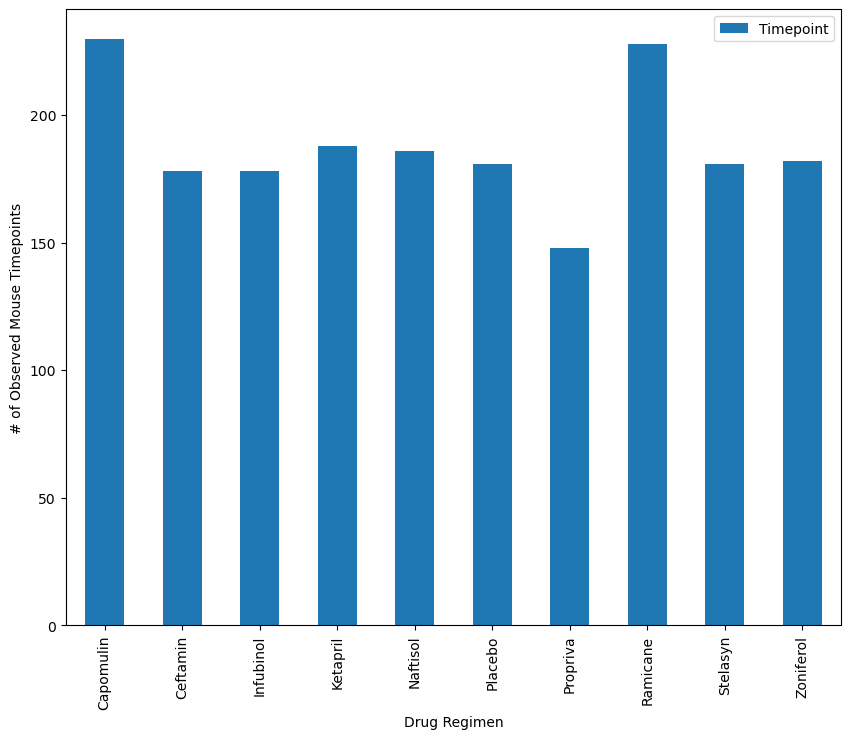

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# create a df of Drug Regimen vs total time points
drug_regimen_timepts_total = unique_mouse_data.groupby('Drug Regimen')['Timepoint'].count()
drug_regimen_timepts_totalDF = pd.DataFrame({"Timepoint": drug_regimen_timepts_total})
#  drug_regimen_timepts_totalDF  #shows the data or Y values for the plot
#   len(drug_regimen_timepts_totalDF) does count 10 rows
#   note example had the data sorted based on timepoints, not clear if that is necessary or why

# Use DataFrame.plot() in order to create a bar chart of the data
drug_regimen_timepts_totalDF.plot(kind="bar", figsize=(10,8))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


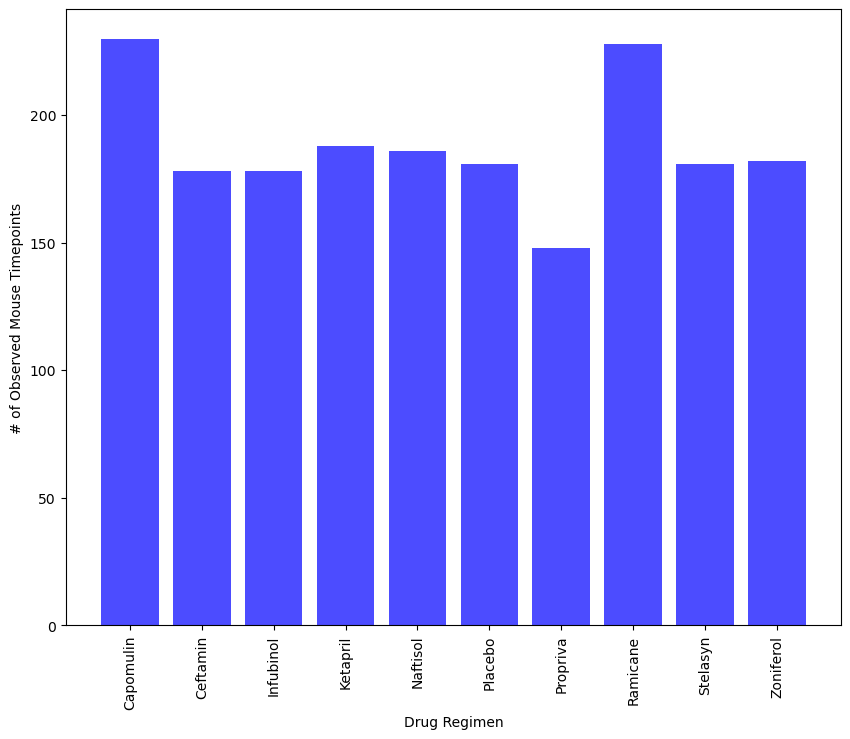

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# note suspect could have created a df not indexed on drug regimen (to autofile x axis labels)

# Set x axis and tick locations
x_axis = np.arange(len(drug_regimen_timepts_totalDF))
tick_locations = [value for value in x_axis]

# creating bar plot via pyplot
plt.figure(figsize=(10,8))
plt.bar(x_axis, drug_regimen_timepts_totalDF["Timepoint"], color='b', alpha=0.7, align="center")
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva",
                            "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

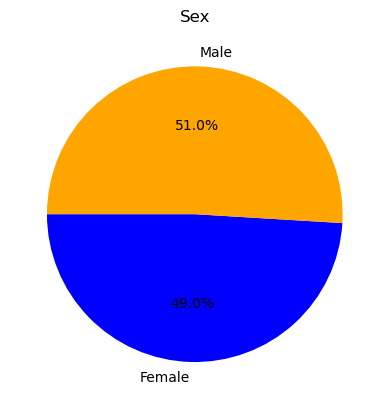

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

unique_mouse_data.groupby('Sex').size().plot(kind='pie', autopct='%1.1f%%', colors=['blue','orange'], startangle=180)
plt.title ("Sex")
plt.show

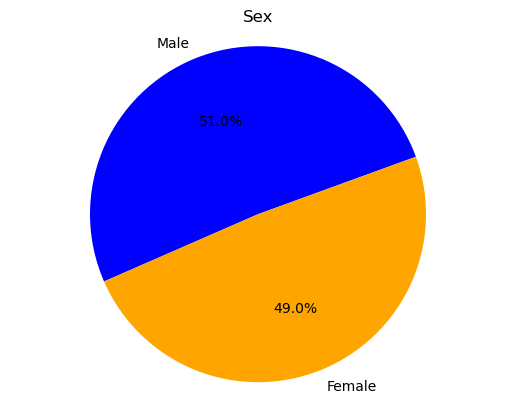

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
total_of_male_female = unique_mouse_data["Sex"].value_counts()  # provides total values of each sex
total_of_male_female
frac_male = (958/1880)  #.round(decimals=1)
frac_male
frac_female = (922/1880)
frac_female
sexes = ["Male", "Female"]
percent_values = [51.0, 49.0]

plt.title("Sex")
plt.pie(percent_values, labels=sexes, colors=['blue','orange'],
        autopct="%1.1f%%", startangle=20)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse

final_timept = pd.DataFrame(unique_mouse_data.groupby('Mouse ID')['Timepoint'].max()).reset_index()
final_timept # shows max timepoint
unique_mouse_fintumvol_data = pd.merge(unique_mouse_data, final_timept, how="inner", on=["Mouse ID","Timepoint"])
unique_mouse_fintumvol_data

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

#unique_mouse_fintumvol_data = unique_mouse_data.append({'Final Tumor Volume': final_tum_vol}, ignore_index=True)
#unique_mouse_fintumvol_data = unique_mouse_data['final_tum_vol']
#unique_mouse_fintumvol_data = pd.merge(unique_mouse_data, final_tum_vol, how="left", on="Mouse ID")
#unique_mouse_fintumvol_data.tail(50)



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
tumor_vol_data = [] 

drugs = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

#drug = drugs[0] # the first test
for drug in drugs:   #for loop to do IQR for each of the drugs in the list
    drug_data = unique_mouse_fintumvol_data.loc[unique_mouse_fintumvol_data["Drug Regimen"]==drug]
#ramicane_data = unique_mouse_data.loc[unique_mouse_data["Drug Regimen"]=="Ramicane"]
#infubinol_data = unique_mouse_data.loc[unique_mouse_data["Drug Regimen"]=="Infubinol"]
#ceftamin_data = unique_mouse_data.loc[unique_mouse_data["Drug Regimen"]=="Ceftamin"]
#capomulin_data.head()
    tumor_vol_df = drug_data['Tumor Volume (mm3)']
    drug_data.append(tumor_vol_df)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outlier_occupancy = drug_data.loc[(drug_data['Tumor Volume (mm3)'] < lower_bound) | (drug_data['Tumor Volume (mm3)'] > upper_bound)]
    print(f"Potential outliers for {drug} are:")
    print (outlier_occupancy)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
        #  for loop here based on Drug Regimen
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
   


Potential outliers for Capomulin are:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Potential outliers for Ramicane are:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Potential outliers for Infubinol are:
   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
20     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
20  Female          18          25  
Potential outliers for Ceftamin are:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


C:\Users\brian\AppData\Local\Temp\ipykernel_11724\1372024469.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  drug_data.append(tumor_vol_df)
C:\Users\brian\AppData\Local\Temp\ipykernel_11724\1372024469.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  drug_data.append(tumor_vol_df)
C:\Users\brian\AppData\Local\Temp\ipykernel_11724\1372024469.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  drug_data.append(tumor_vol_df)
C:\Users\brian\AppData\Local\Temp\ipykernel_11724\1372024469.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  drug_data.append(tumor_vol_df)


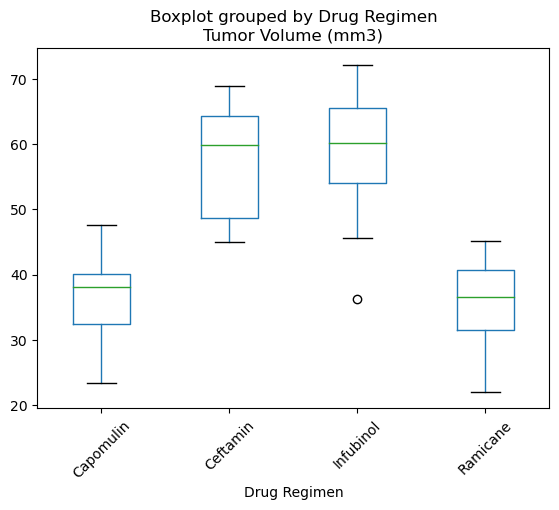

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# note drug_data only contains the last cycle of information or for Ceftamin  SO generated a trimmed df
#also generated various not quite right or four separate subplots before settling on a boxplot through pandas
#tum_vol_box = drug_data['Tumor Volume (mm3)']

#    fig1, ax1 = plt.subplots()
#ax1.set_title('Capomulin, Ramicane, Infubinol, Ceftamin')
#    ax1.set_ylabel('Final Tumor Volume (mm3)')
#   ax1.boxplot(tum_vol_box)
#  #   plt.show()
#fig1, ax1 = plt.subplots()
#ax1.set_ylabel('Final Tumor Volume (mm3)')
#drug_data.groupby('Drug Regimen').boxplot(column='Tumor Volume (mm3)', grid=False, rot=45)
#plt.show

four_drug_vol = unique_mouse_fintumvol_data[(unique_mouse_fintumvol_data['Drug Regimen']=='Capomulin') | (unique_mouse_fintumvol_data['Drug Regimen']=='Ramicane')
                                             | (unique_mouse_fintumvol_data['Drug Regimen']=='Infubinol') | (unique_mouse_fintumvol_data['Drug Regimen']=='Ceftamin') ]
four_drug_volDF = pd.DataFrame(four_drug_vol)
#four_drug_volDF.head(50) to confirm trimmed datdframe

boxplot = four_drug_volDF.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False, rot=45)


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment for mouse x401')

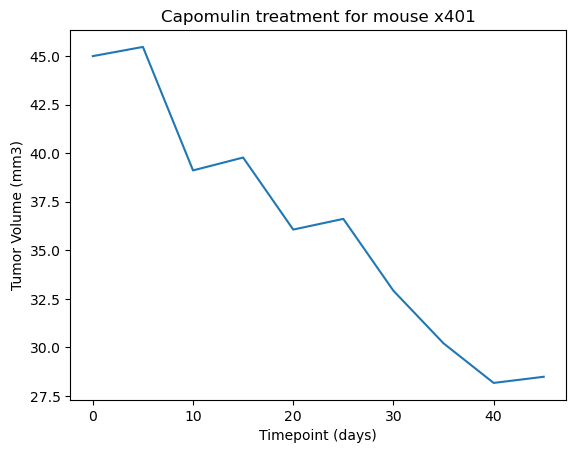

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#first truncate df to one mouse x401
x401_data = unique_mouse_data[(unique_mouse_data['Mouse ID']=='x401')]
#x401_data # to confirm data
plt.plot(x401_data['Timepoint'], x401_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment for mouse x401')



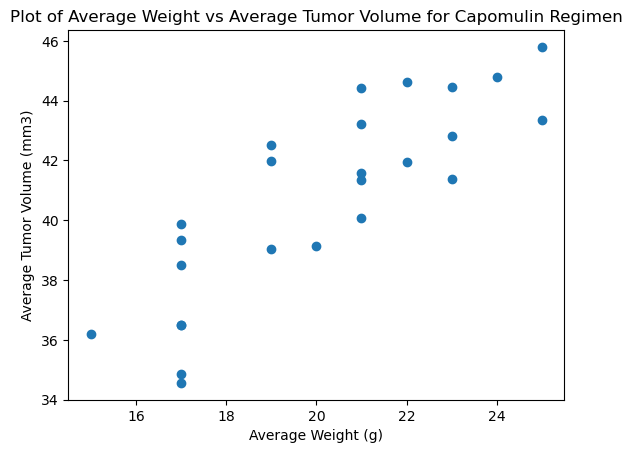

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#generate the Capomulin df
Capomulin_data = unique_mouse_data[(unique_mouse_data['Drug Regimen']=='Capomulin')]
Cap_mouse_av_tumol = Capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
Cap_mouse_av_wgt = Capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Build scatter plot for tum vol vs mouse wgt for Capomulin regimen
x_values = Cap_mouse_av_wgt
y_values = Cap_mouse_av_tumol
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Plot of Average Weight vs Average Tumor Volume for Capomulin Regimen')

# Show plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the aver tumor volume is: 0.84


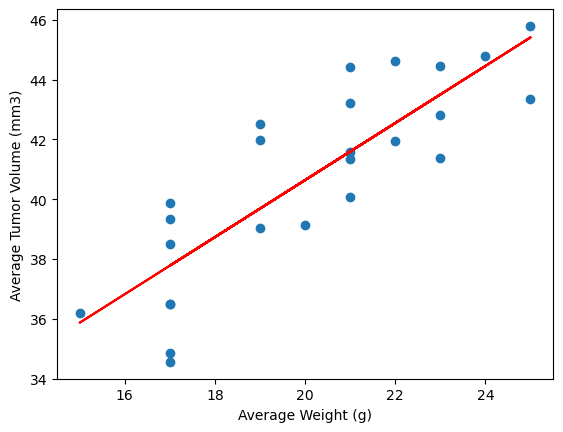

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

x_values = Cap_mouse_av_wgt
y_values = Cap_mouse_av_tumol
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Print r value
print(f"The correlation between mouse weight and the aver tumor volume is: {rvalue:.2f}")

# Show plot
plt.show()


